# Визуализация данных с помощью библиотеки matplotlib
<img src="./logo2_compressed.svg"/>

Matplotlib - один из самых мощных инструментов визуализации данных.\
Эта библиотека включает множество различных методов визуализации данных,\
такие как 2D и 3D графики, гистограммы, круговые и столбцовые диаграммы, и многое другое.\
Все типы графиков обладают множеством возможностей конфигурирования.\
Как правило, Matplotlib используется в комплексе с другими инструментами\
для работы с данными, такими как Numpy, Pandas и OpenCV.

Для возможности отображения графиков в ячейках Jupyter необходимо\
выполнить следующую инструкцию:

In [1]:
%matplotlib inline

Импорт модуля:

In [2]:
import matplotlib.pyplot as plt

Импортируем прочие необходимые для семинара библиотеки:

In [3]:
import sys
import os
import numpy as np
import random
import pandas as pd
import time

Будем использовать датасет Covid-19, доступный по адресу: [https://github.com/datasets/covid-19](https://github.com/datasets/covid-19)\
\
Необходимо выполнить следующие команды:
```
git clone https://github.com/datasets/covid-19 
cd covid-19
pip install -r scripts/requirements.txt
python scripts/process.py
```

In [4]:
# !git clone https://github.com/datasets/covid-19
# !cd covid-19; git pull; pip install -r scripts/requirements.txt; python scripts/process.py

Загружаем данные из CSV-таблицы с помощью pandas:

In [5]:
aggr_data = pd.read_csv("./covid-19/data/countries-aggregated.csv")

Табличные данные содержат количество подтверждённых случаев\
заболевания Covid-19, выздоровевших и умерших для каждой страны\
на каждую дату, начиная с 22 января 2020 года

In [6]:
aggr_data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


Получим данные заболеваемости по России

In [7]:
russia_data = aggr_data[aggr_data['Country'] == 'Russia'][["Date", "Confirmed"]]

Pandas имеет встроенные функции визуализации данных

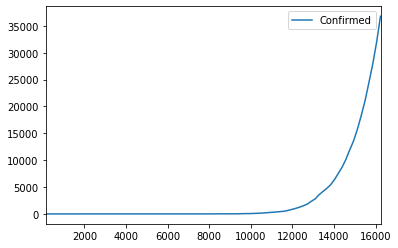

In [8]:
russia_data.plot()

Приведём данные в формат numpy и разделим их по столбцам

In [27]:
def get_nonzero_row(data, country, row_name):
    """Функция, помогающая извлечь все ненулевые данные
    заданного типа для заданной страны и соответствующие им даты
    """
    country_data = data[(data['Country'] == country) &
                        (data[row_name] > 0)]
    date = country_data["Date"].values
    
    dates_np = np.array([np.datetime64(d) for d in date])
    values_np = country_data[row_name].values
    return dates_np, values_np

Простой пример построения нескольких графиков.\
Построим три графика зависимости числа заболевших,\
выздоровевших и умерших от Covid-19 граждан России.\
\
Формат вызова функции построения графика: \
plt.plot(x, y, label, ...)\
\
plt.grid() - отобразить сетку

In [28]:
dates_confirmed, confirmed = get_nonzero_row(aggr_data, "Russia", "Confirmed")
dates_recovered, recovered = get_nonzero_row(aggr_data, "Russia", "Recovered")
dates_deaths, deaths = get_nonzero_row(aggr_data, "Russia", "Deaths")

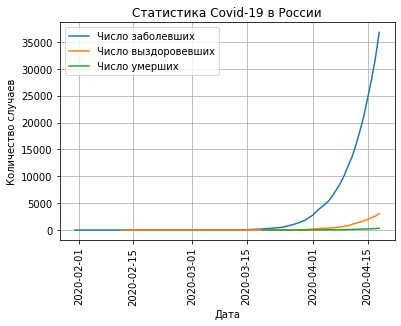

In [29]:
plt.plot(dates_confirmed, confirmed, label="Число заболевших")
plt.plot(dates_recovered, recovered, label="Число выздоровевших")
plt.plot(dates_deaths, deaths, label="Число умерших")
plt.grid()
plt.xlabel("Дата")
plt.xticks(rotation=90)
plt.ylabel("Количество случаев")
plt.title("Статистика Covid-19 в России")
plt.legend()
plt.show()

Отобразим графики заболеваемости России, Китая и Италии.\
\
Для этого создадим объект контейнера графиков и три графика внутри него:\
fig - контейнер графиков\
ax - список из трёх вгрфиков\
\
ax.set_yscale("log") позволяет использовать логарифмическую шкалу по оси y\
ax.label_outer() позволяет спрятать надписи вдоль общей оси для всех графиков, кроме нижнего

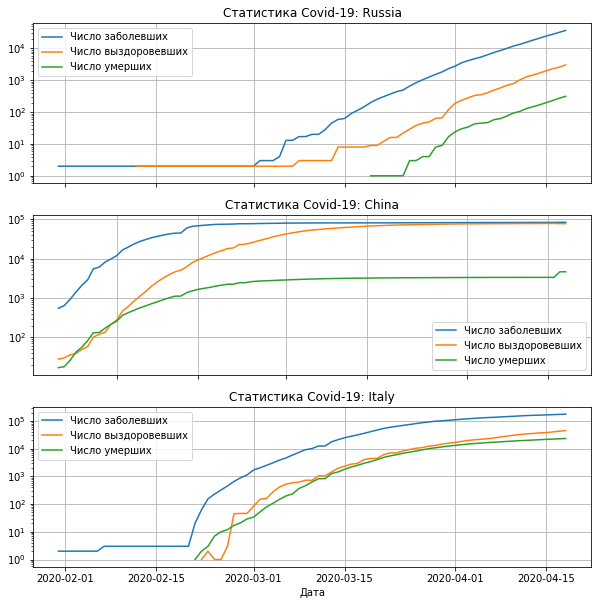

In [31]:
countries = ["Russia", "China", "Italy"]
fig, ax = plt.subplots(len(countries), figsize=(10,10))
for i, country in enumerate(countries):
    dates_confirmed, confirmed = get_nonzero_row(aggr_data, country, "Confirmed")
    dates_recovered, recovered = get_nonzero_row(aggr_data, country, "Recovered")
    dates_deaths, deaths = get_nonzero_row(aggr_data, country, "Deaths")
    ax[i].plot(dates_confirmed, confirmed, label="Число заболевших")
    ax[i].plot(dates_recovered, recovered, label="Число выздоровевших")
    ax[i].plot(dates_deaths, deaths, label="Число умерших")
    ax[i].grid()
    ax[i].set_yscale("log")
    ax[i].set_xlabel("Дата")
    ax[i].set_title(f"Статистика Covid-19: {country}")
    ax[i].legend()
    ax[i].label_outer()

Таблица reference.csv содержит основные данные по каждой стране:\
Координаты, население, название столицы и т.п.

In [32]:
ref_data = pd.read_csv("./covid-19/data/reference.csv")
ref_data = ref_data[pd.notna(ref_data['iso2'])] # Исключаем не-страны (напр., "Diamond Princess")
ref_data = ref_data[pd.isna(ref_data['Province_State'])] # Исключаем провинции

In [33]:
ref_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


Построим гистограмму смертности по странам мира.\
Функция plt.hist() осуществляет отображение гистограммы

In [46]:
def get_country_info(data, country):
    lat = data[(data['Combined_Key'] == country)]["Lat"].values
    lon = data[(data['Combined_Key'] == country)]["Long_"].values
    pop = data[(data['Combined_Key'] == country)]["Population"].values
    return lat[0], lon[0], int(pop[0])

In [51]:
all_countries = ref_data["Combined_Key"].values # Названия всех стран мира
rel_deaths = []
for country in all_countries:
    _, confirmed = get_nonzero_row(aggr_data, country, "Confirmed")
    _, deaths = get_nonzero_row(aggr_data, country, "Deaths")
    if len(deaths) > 0 and len(confirmed) > 0:
        current_confirmed = confirmed[-1] # Текущее значение подтверждённых случаев
        deaths_confirmed = deaths[-1] # Текущее значение умерших
        rel_deaths.append(deaths_confirmed / current_confirmed)

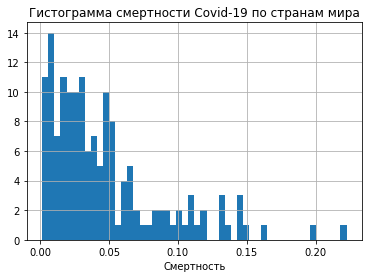

In [52]:
plt.hist(rel_deaths, bins=50)
plt.grid()
plt.xlabel("Смертность")
plt.title("Гистограмма смертности Covid-19 по странам мира")
plt.show()